# Numeriske metoder i matematikk og fysikk
Vi skal her se på noen numeriske metoder som brukes for å løse problemer i matematikk og fysikk:

## Estimere løsninger av likninger
* Newtons metode
* Biseksjonsmetoden
* Grafisk

## Estimere bestemte integral
* Numerisk integrasjon ved rektangelmetoden

## Estimere funksjonsverdier fra en differensiallikning
* Eulers metode

### Newtons metode
Metoden estimerer en løsning av likninger på formen $f(x) = 0$. Du må derivere funksjonen og du må velge en startverdi for x. Metoden er ikke garantert å virke i alle tilfeller, og den finner ikke alle løsninger av likningen.

Du bruker startverdien til å beregne neste verdi, som brukes til å beregne neste verdi osv. Når du har gjort dette mange nok ganger har du som regel en x-verdi som vil være en god tilnærming til en løsning av likningen. Med startverdi $x_0$ beregnes $x_1$ osv. Selve uttrykket vi bruker er:

$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$

La oss se på likningen $x^2 + 3x = e^x$. Vi skriver den om til $x^2 + 3x - e^x = 0$, og har da $f(x) = x^2 + 3x - e^x$. Da er $f'(x) = 2x + 3 - e^x$. La oss gjette på $x_0 = 5$.

In [1]:
import math

x = 5
n = 5

for i in range(n):
    f = x**2 + 3*x - math.exp(x)
    f_derivert = 2*x + 3 - math.exp(x)
    x = x - f/f_derivert
    print('Verdien av x er',x)

f = x**2 + 3*x - math.exp(x)
print('Med siste verdi av x er verdien til f',f)

Verdien av x er 4.199389779981038
Verdien av x er 3.5403007512852147
Verdien av x er 3.0761944616106733
Verdien av x er 2.8379038139952213
Verdien av x er 2.776919924027586
Med siste verdi av x er verdien til f -0.02740548343457405


At påfølgende x-verdier likner på hverandre er ikke et bevis på at løsningen er god nok. Det som betyr noe er at funksjonsverdien er nære nok null. Bruker en while-løkke med et presisjonskrav.

In [2]:
import math

x = 5
presisjon = 0.001
f = x**2 + 3*x - math.exp(x)
f_derivert = 2*x + 3 - math.exp(x)
x = x - f/f_derivert

while abs(f) >= presisjon:
    f_derivert = 2*x + 3 - math.exp(x)
    x = x - f/f_derivert
    f = x**2 + 3*x - math.exp(x)

print('Verdien av x som var god nok er',x)
print('Med denne verdien av x er verdien til f',f)

Verdien av x som var god nok er 2.7732660684133874
Med denne verdien av x er verdien til f -3.831853604552293e-05


Ved å bruke verktøyet sympy kan vi regne symbolsk i Python. Da kan vi be Python derivere for oss.

In [3]:
from sympy import *
x = symbols('x')

f = x**2 + 3*x - exp(x)
f_derivert = diff(f, x)

x_n = 5
presisjon = 0.001

while abs(f.subs(x,x_n).evalf()) >= presisjon:
    x_n = x_n - f.subs(x,x_n).evalf()/f_derivert.subs(x,x_n).evalf()

print('Verdien av x som var god nok er',x_n)
print('Med denne verdien av x er verdien til f',f.subs(x,x_n).evalf())

Verdien av x som var god nok er 2.77327344894028
Med denne verdien av x er verdien til f -9.34094515123718e-5


In [7]:
from sympy import *
x = symbols('x')

f = x**2 + 3*x - exp(x)
f_derivert = diff(f, x)

print(f)

print(f_derivert)

print(f.subs(x, 3))

x**2 + 3*x - exp(x)
2*x - exp(x) + 3
-exp(3) + 18


### Biseksjonsmetoden/halveringsmetoden
Metoden estimerer en løsning av likninger på formen $f(x) = 0$, gitt at du har et intervall $[a, b]$ der $f(a)$ og $f(b)$ har ulike fortegn og $f(x)$ er kontinuerlig. Metoden finner ikke alle løsninger av likningen.

Du finner midtpunktet i intervallet og beregner funksjonsverdien i midtpunktet. Dersom funksjonsverdien er nære nok null er vi ferdige. Ellers halverer vi intervallet slik at det nye intervallet ennå har ulikt fortegn på funksjonsverdiene på endene.

La oss se på likningen $x^2 + 3x = e^x$ i intervallet $[1, 4]$. Vi skriver den om til $x^2 + 3x - e^x = 0$, og har da $f(x) = x^2 + 3x - e^x$.

$f(1) = 1^2 + 3\cdot 1 - e^1 \approx 1.28 > 0$

$f(4) = 4^2 + 3 \cdot 4 - e^4 \approx -26.6 < 0$

Vi har et intervall der funksjonsverdien får ulikt fortegn på endene.

In [8]:
import math

presisjon = 0.001

a = 1
b = 4
c = (a+b)/2

f_a = a**2 + 3*a - math.exp(a)
f_b = b**2 + 3*b - math.exp(b)
f_c = c**2 + 3*c - math.exp(c)

while abs(f_c) >= presisjon:
    if f_a*f_c > 0:
        a = c
        f_a = f_c
    else:
        b = c
        f_b = f_c
    c = (a+b)/2
    f_c = c**2 + 3*c - math.exp(c)
    
    print(a,b,c)
    print(f_a, f_b, f_c)

2.5 4 3.25
1.5675060392965268 -26.598150033144236 -5.477839917193062
2.5 3.25 2.875
1.5675060392965268 -5.477839917193062 -0.8347991214616428
2.5 2.875 2.6875
1.5675060392965268 -0.8347991214616428 0.5902635212110585
2.6875 2.875 2.78125
0.5902635212110585 -0.8347991214616428 -0.0600807599464126
2.6875 2.78125 2.734375
0.5902635212110585 -0.0600807599464126 0.2798162852545474
2.734375 2.78125 2.7578125
0.2798162852545474 -0.0600807599464126 0.11364871853570868
2.7578125 2.78125 2.76953125
0.11364871853570868 -0.0600807599464126 0.027741941630644362
2.76953125 2.78125 2.775390625
0.027741941630644362 -0.0600807599464126 -0.01592831179743115
2.76953125 2.775390625 2.7724609375
0.027741941630644362 -0.01592831179743115 0.005966887673924504
2.7724609375 2.775390625 2.77392578125
0.005966887673924504 -0.01592831179743115 -0.004965668720707583
2.7724609375 2.77392578125 2.773193359375
0.005966887673924504 -0.004965668720707583 0.0005043671650284409


### Grafisk løsning av likninger
Metoden estimerer en løsning av likninger på formene $f(x) = 0$ og $g(x) = h(x)$. Metoden finner ikke alle løsninger av likningen.

La oss se på likningen $x^2 + 3x = e^x$. Vi skal se på begge formene, både $x^2 + 3x = e^x$ og $x^2 + 3x - e^x = 0$.

Vi begynner med $x^2 + 3x - e^x = 0$. Det vi ser etter er et nullpunkt for en funksjon. Det kan vi finne ved å plotte grafen og se hvor den skjærer x-aksen. Ved å bruke kommandoen "%matplotlib notebook" får vi mulighet til å zoome i figuren, se vinduet under. Trykk på "strøm-knappen" øverst til høyre for å deaktivere figuren når du er ferdig med den.

<IPython.core.display.Javascript object>


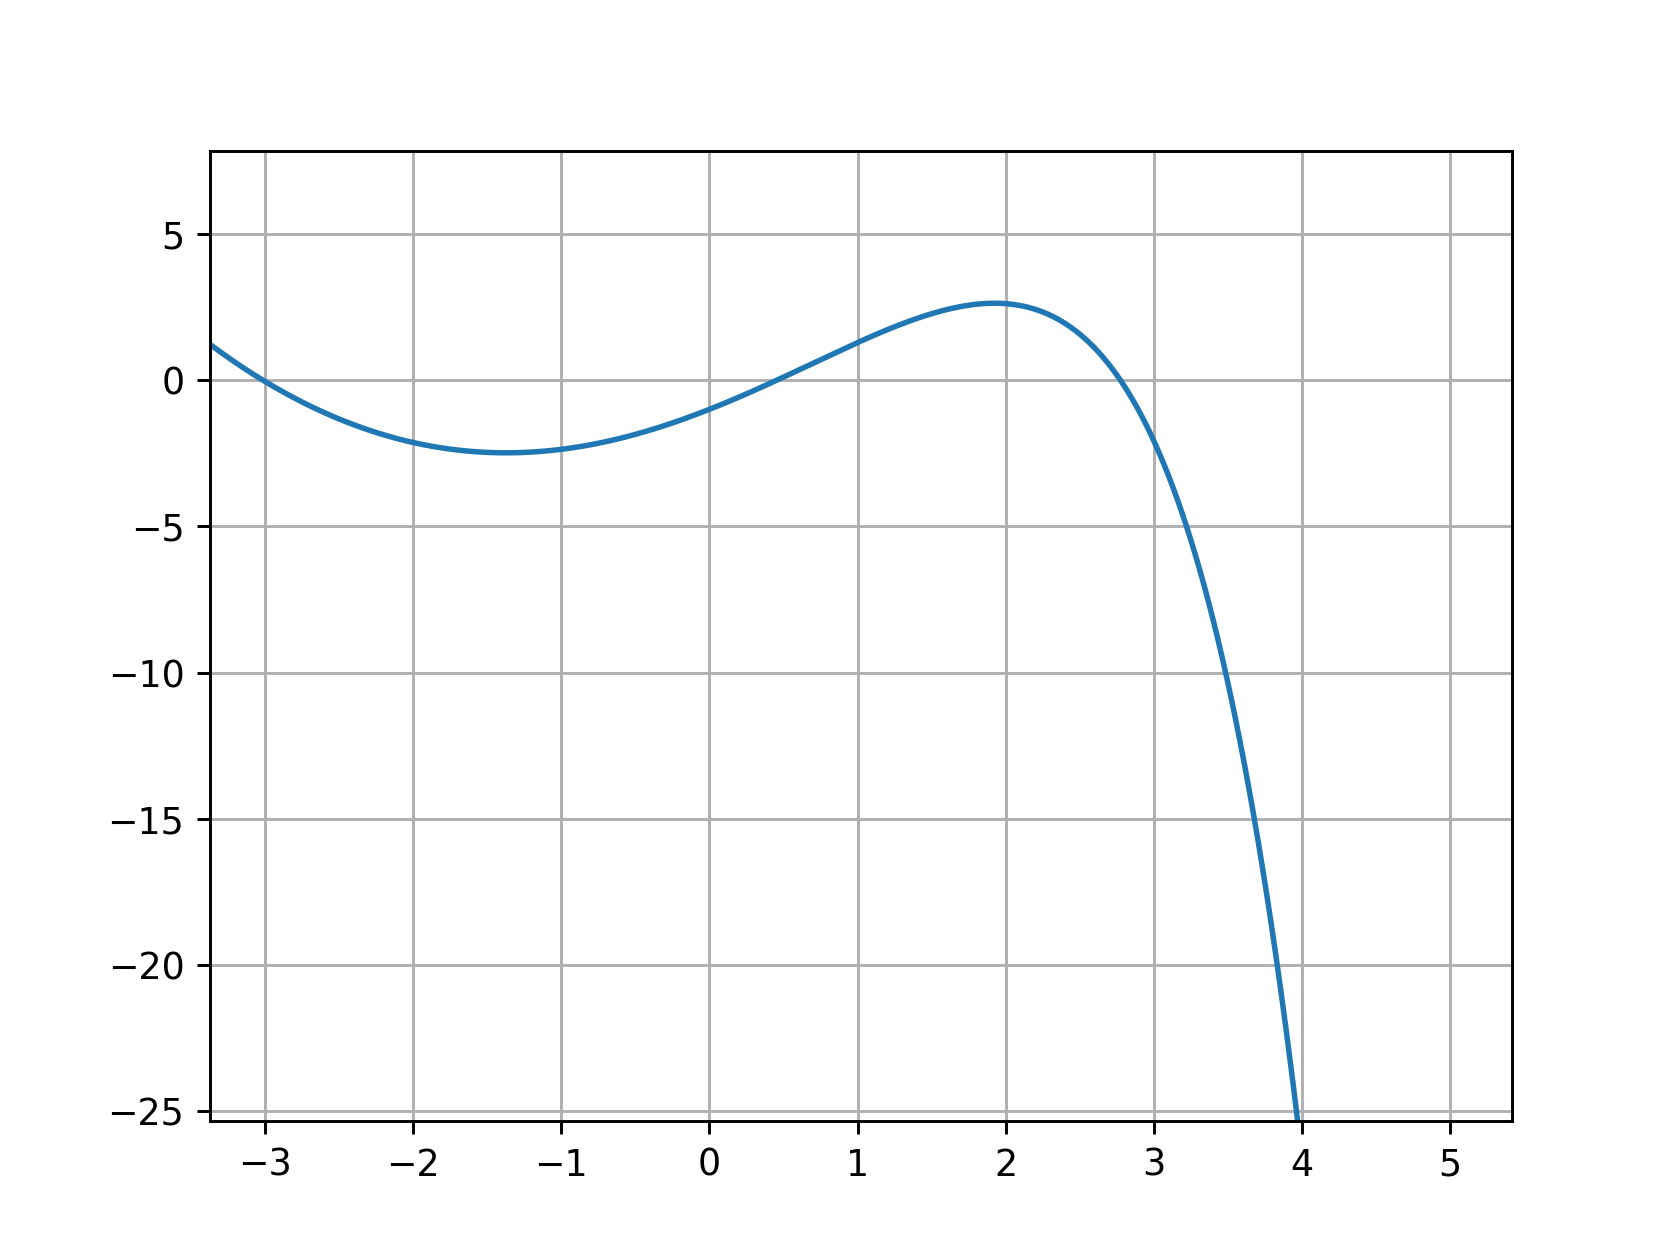

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

x = np.arange(-4, 4, 0.01)
f = x**2 + 3*x - np.exp(x)

plt.plot(x, f)
plt.grid()
plt.show()

Vi ser nå på den opprinnelige likningen $x^2 + 3x = e^x$. Det vi ser etter nå er skjæringspunktet mellom to grafer, og vi kan benytte tilsvarende fremgangsmåte som over. Først må vi plotte begge grafer i samme vindu.

<IPython.core.display.Javascript object>


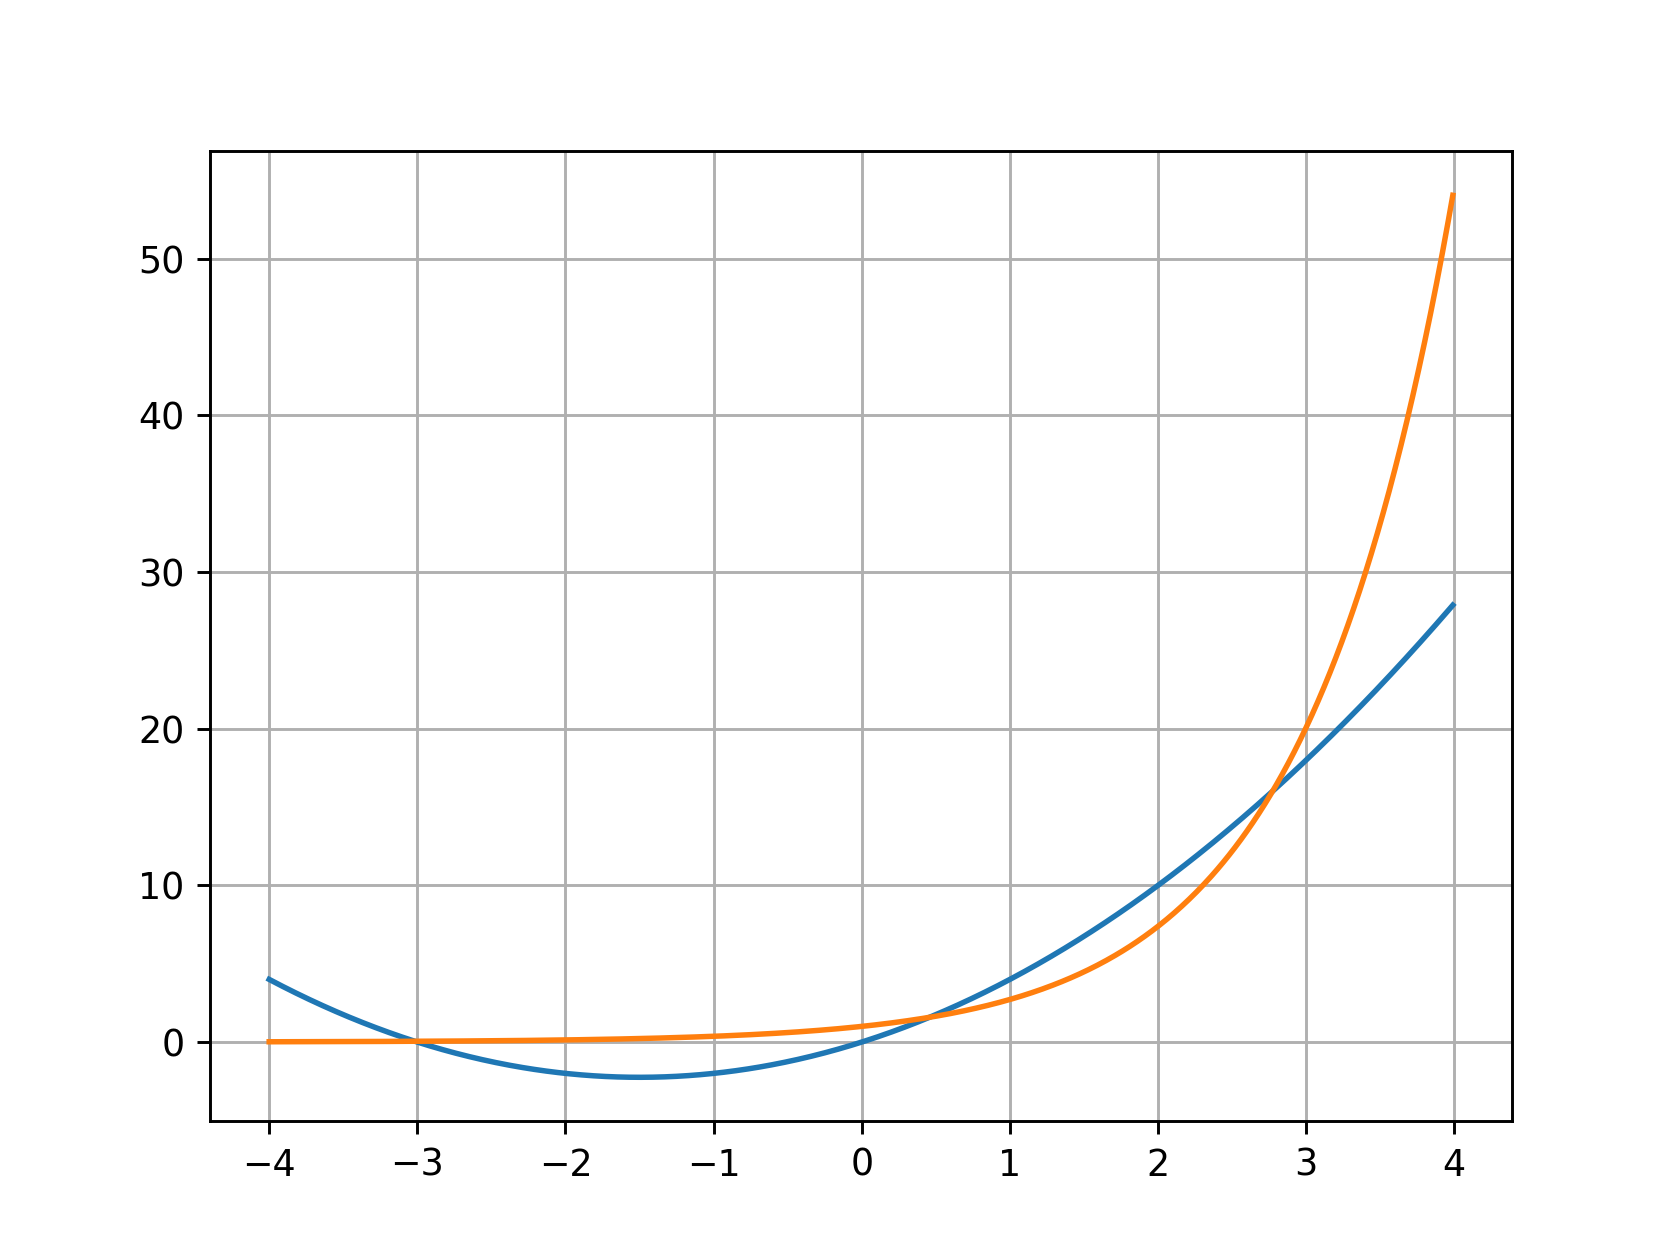

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

x = np.arange(-4, 4, 0.01)
g = x**2 + 3*x
h = np.exp(x)

plt.plot(x, g, x, h)
plt.grid()
plt.show()

### Numerisk integrasjon ved rektangelmetoden
Vi ser nå på numerisk integrasjon, altså en tilnærming til verdien av et bestemt integral.

De tre vanligste metodene er rektangelmetoden, trapesmetoden og Simpsons metode. Vi ser bare på rektangelmetoden her. Grunnen til det er at med en datamaskin kan man ha så mange rektangler man vil, og da blir de så smale at det blir godt nok omtrent uansett. Derfor er det ikke nødvendig å bry seg med trapesmetoden eller Simpsons metode som er litt (men ikke mye) mer krevende å skrive kode for. Vi skal her bruke midtpunktene i intervallene for å beregne høyden til rektanglene.

La oss se på følgende: $\int_2^8 (\cos(x^2) - x) dx$

<IPython.core.display.Javascript object>


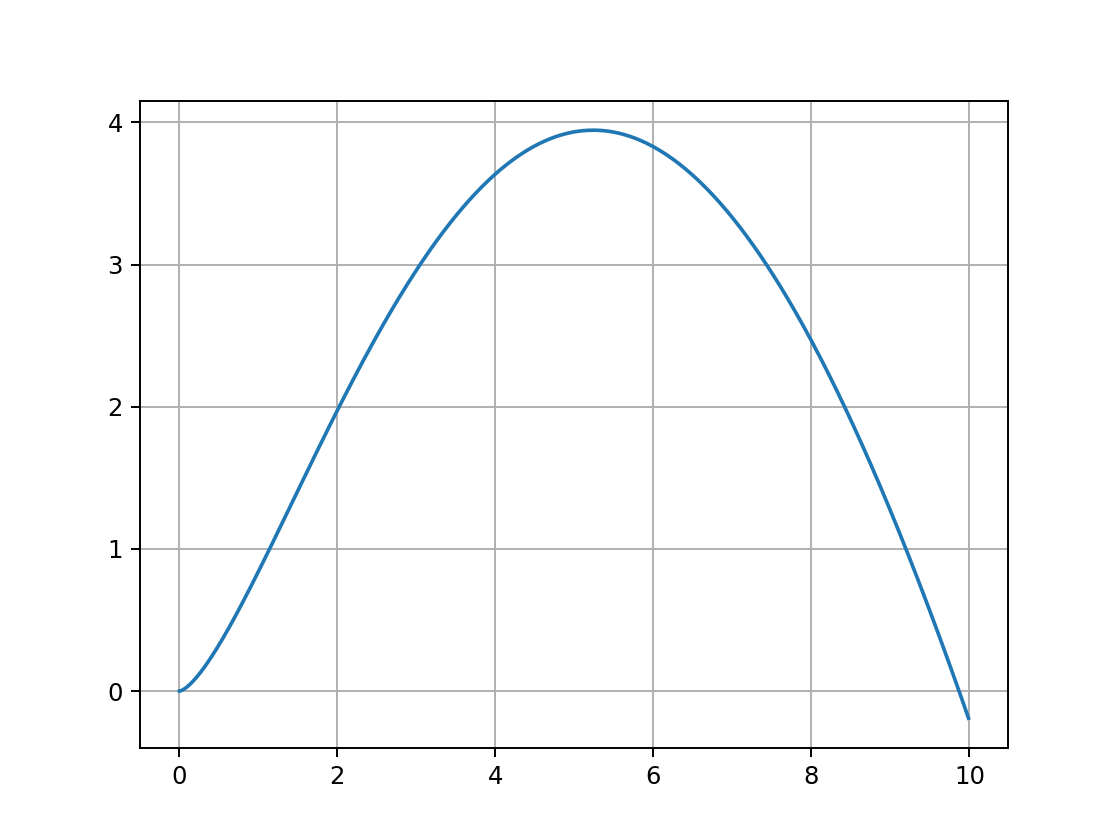

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

x = np.arange(0, 10, 0.01)
f = x*np.sin(np.sqrt(x))

plt.plot(x, f)
plt.grid()
plt.show()

In [30]:
import numpy as np

a = 2
b = 8
N = 100
delta = (b-a)/N
x = a + delta/2

delsum = 0

for i in range(N):
    høyde = x*np.sin(np.sqrt(x))
    rektangel = høyde * delta
    delsum = delsum + rektangel
    x = x + delta

print("Verdien av integralet er tilnærmet lik",round(delsum,2))

Verdien av integralet er tilnærmet lik 20.09


### Eulers metode
Dette er en metode for å estimere funksjonsverdier dersom vi har en første ordens differensiallikning og kjenner funksjonsverdien i et punkt.

Vi må altså ha $y' = \frac{dy}{dx} = f(x,y)$ og $y(a) = b$, og vi ønsker å finne $y(c)$.

Metoden er å bruke den deriverte for å beregne en tangent, og så følge den tangenten en viss distanse før vi beregner en ny tangent i det nye punktet. Avviket fra den riktige grafen blir større jo lenger unna startpunktet vi går, og mindre hvis hvert steg er lite. Vi bruker $x_0$ eller $t_0$ og sammen med $y_0$ for å beregne $y_1$: $y_{n+1} = y_n + y'(x_n, y_n) \cdot h$, og $x_{n+1} = x_n + h$, der $h$ er steglengden.

La oss se på differensiallikningen $y' = \frac{dy}{dx} = y - t^2 + \frac{1}{10}e^t, y(0)=1$. Vi ønsker å estimere funksjonsverdien ved $t = 3$. Vi tar 6 steg, slik at steglengden blir 0.5.

In [43]:
import numpy as np

t = 0
y = 1
n = 6
b = 3

h = (b - t)/n

for i in range(n):
    y_deriv = y - t**2 + 1/10 * np.exp(t)
    y = y + y_deriv*h
    t = t + h

print(t, y)

3.0 3.33728655607


Under ser vi den eksakte løsningen av differensiallikningen. Prøv gjerne å zoome inn på grafen ved t = 3 for å se hva funksjonsverdien er. Prøv også å endre antall steg for å se om tilnærmingen blir bedre eller dårligere.

<IPython.core.display.Javascript object>


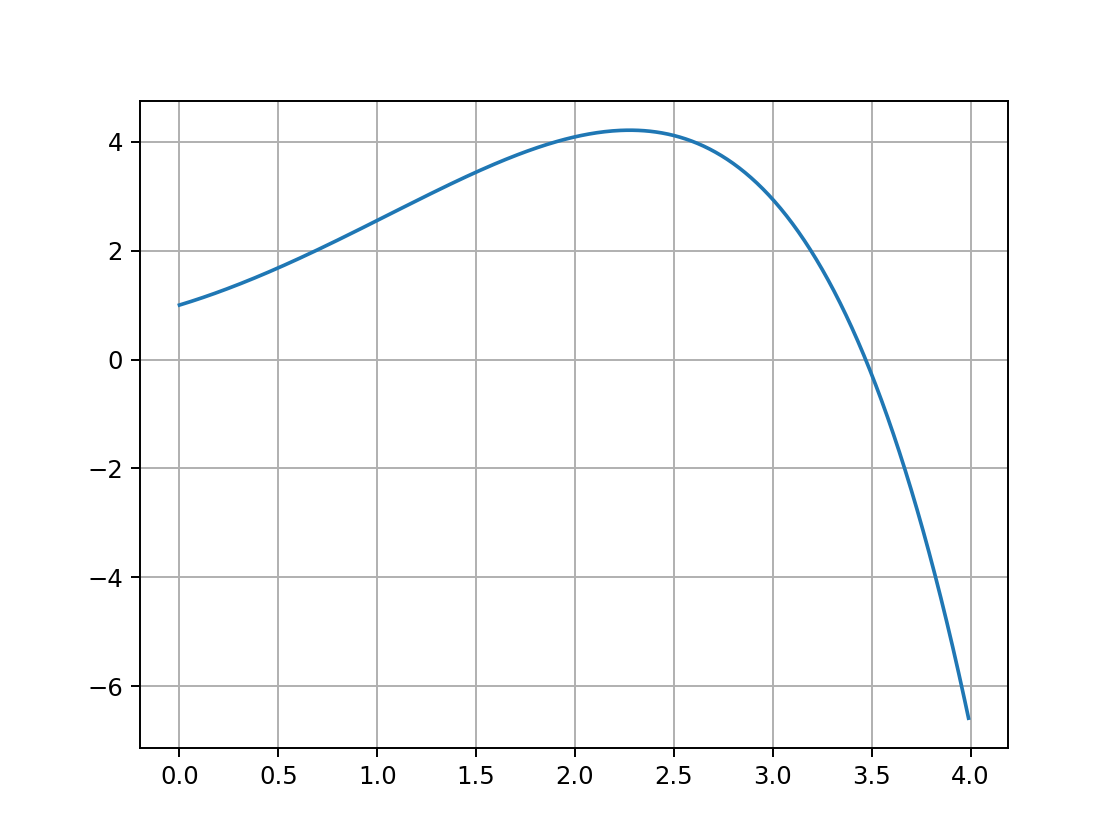

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

t = np.arange(0, 4, 0.01)

f = 2 + np.exp(t)*(-1 + 0.1*t) + 2*t + t**2

plt.plot(t, f)
plt.grid()
plt.show()

Under er en variant som også plotter tangentene vi følger, slik at vi kan se at avviket øker etter hvert.

<IPython.core.display.Javascript object>


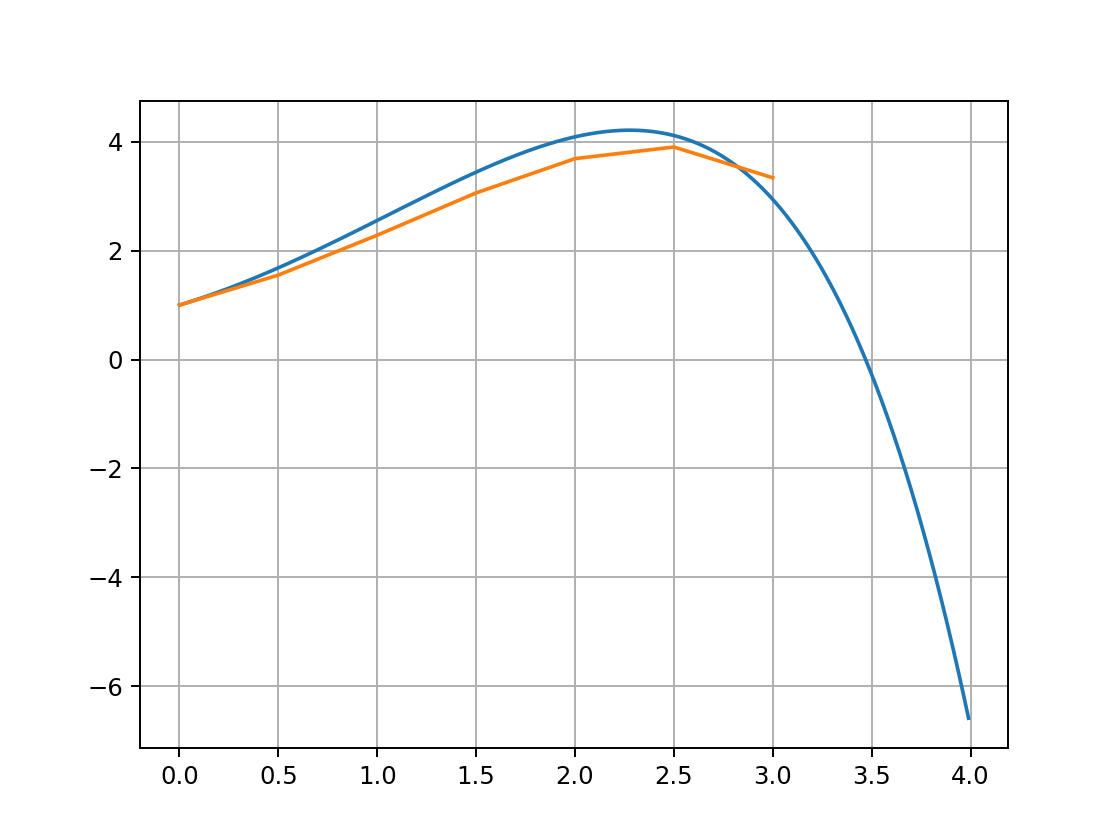

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

t = 0
y = 1
n = 6
b = 3

h = (b - t)/n

y_list = [y]
t_list = [t]

for i in range(n):
    y_deriv = y - t**2 + 1/10 * np.exp(t)
    y = y + y_deriv*h
    y_list.append(y)
    t = t + h
    t_list.append(t)







t = np.arange(0, 4, 0.01)
f = 2 + np.exp(t)*(-1 + 0.1*t) + 2*t + t**2

plt.plot(t, f, t_list, y_list)
plt.grid()
plt.show()

###### Øystein Grøndahl, mars 2018